In [2]:
#referencia https://medium.com/towards-artificial-intelligence/multi-class-text-classification-using-pyspark-mllib-doc2vec-dbfcee5b39f2
import findspark
findspark.init() 
from pyspark.sql import SparkSession
import os


MAX_MEMORY = "8g"
spark = SparkSession.builder \
                    .master("local") \
                    .appName('va_repositorio')\
                    .config("spark.executor.memory", MAX_MEMORY) \
                    .config("spark.driver.memory", MAX_MEMORY) \
                    .config("spark.jars", "E:\\va\\driverdb\\postgresql-42.2.5.jre6") \
                    .getOrCreate()

In [3]:
tabla="proyecto.view_clase_va"
df  = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://localhost:5432/va") \
    .option("dbtable", tabla) \
    .option("user", "postgres") \
    .option("password", "david") \
    .option("driver", "org.postgresql.Driver") \
    .load()
df.printSchema()

root
 |-- periodo: string (nullable = true)
 |-- estu_mcpio_reside: string (nullable = true)
 |-- estu_genero: string (nullable = true)
 |-- estu_estadocivil: string (nullable = true)
 |-- estu_etnia: string (nullable = true)
 |-- estu_limita_motriz: string (nullable = true)
 |-- estu_limita_invidente: string (nullable = true)
 |-- estu_limita_sordoconinterprete: string (nullable = true)
 |-- estu_limita_sordosininterprete: string (nullable = true)
 |-- estu_limita_sordoceguera: string (nullable = true)
 |-- estu_porcentajecreditosaprob: string (nullable = true)
 |-- estu_valormatriculauniversidad: string (nullable = true)
 |-- estu_pagomatriculabeca: string (nullable = true)
 |-- estu_pagomatriculacredito: string (nullable = true)
 |-- estu_pagomatriculapadres: string (nullable = true)
 |-- estu_pagomatriculapropio: string (nullable = true)
 |-- estu_tomo_cursopreparacion: string (nullable = true)
 |-- estu_cursodocentesies: string (nullable = true)
 |-- estu_cursoiesapoyoexterno: str

In [4]:
#castear periodo
from pyspark.sql.types import *
df = (df
      .withColumn("periodo", df["periodo"].cast(DoubleType()))
      .withColumn("clase_va_razonamiento_cuantitativo", df["clase_va_razonamiento_cuantitativo"].cast(DoubleType()))
      .withColumn("clase_va_competencias_ciudadanas", df["clase_va_competencias_ciudadanas"].cast(DoubleType()))
      .withColumn("clase_va_lectura_critica", df["clase_va_lectura_critica"].cast(DoubleType()))
      .withColumn("clase_va_ingles", df["clase_va_ingles"].cast(DoubleType()))
      .withColumn("estu_semestrecursa", df["estu_semestrecursa"].cast(DoubleType()))
      .withColumn("fami_numpersonasacargo", df["fami_numpersonasacargo"].cast(DoubleType()))
      .withColumn("fami_personashogar", df["fami_personashogar"].cast(DoubleType()))
      .withColumn("fami_cuartoshogar", df["fami_cuartoshogar"].cast(DoubleType()))
      .withColumn("fami_estratovivienda", df["fami_estratovivienda"].cast(DoubleType()))
      .withColumn("fami_nivel_sisben", df["fami_nivel_sisben"].cast(DoubleType()))
      .withColumn("estu_porcentajecreditosaprob", df["estu_porcentajecreditosaprob"].cast(DoubleType()))
      .withColumn("estu_cursodocentesies", df["estu_cursodocentesies"].cast(DoubleType()))
      .withColumn("estu_cursoiesapoyoexterno", df["estu_cursoiesapoyoexterno"].cast(DoubleType()))
      .withColumn("estu_cursoiesexterna", df["estu_cursoiesexterna"].cast(DoubleType()))
      .withColumn("estu_dedicacioninternet", df["estu_dedicacioninternet"].cast(DoubleType()))
      .withColumn("fami_cuantoscompartebano", df["fami_cuantoscompartebano"].cast(DoubleType()))
      .withColumn("estu_dedicacionlecturadiaria", df["estu_dedicacionlecturadiaria"].cast(DoubleType()))
     )

#df.createOrReplaceTempView('icfesview')
#df=spark.sql("SELECT * from icfesview where estu_prgm_academico like '%ingeni%sis%' or estu_prgm_academico like '%ingeni%elec%' or estu_prgm_academico like '%ingeni%civ%' ")
df.printSchema()

root
 |-- periodo: double (nullable = true)
 |-- estu_mcpio_reside: string (nullable = true)
 |-- estu_genero: string (nullable = true)
 |-- estu_estadocivil: string (nullable = true)
 |-- estu_etnia: string (nullable = true)
 |-- estu_limita_motriz: string (nullable = true)
 |-- estu_limita_invidente: string (nullable = true)
 |-- estu_limita_sordoconinterprete: string (nullable = true)
 |-- estu_limita_sordosininterprete: string (nullable = true)
 |-- estu_limita_sordoceguera: string (nullable = true)
 |-- estu_porcentajecreditosaprob: double (nullable = true)
 |-- estu_valormatriculauniversidad: string (nullable = true)
 |-- estu_pagomatriculabeca: string (nullable = true)
 |-- estu_pagomatriculacredito: string (nullable = true)
 |-- estu_pagomatriculapadres: string (nullable = true)
 |-- estu_pagomatriculapropio: string (nullable = true)
 |-- estu_tomo_cursopreparacion: string (nullable = true)
 |-- estu_cursodocentesies: double (nullable = true)
 |-- estu_cursoiesapoyoexterno: dou

In [9]:
#CONVERTIR EL DF A TO PANDAS
df_pan=df.toPandas().drop(columns=['estu_consecutivo','estu_mcpio_reside','estu_nse_ies','estu_limita_motriz',
                                   'estu_limita_invidente','estu_limita_sordoconinterprete','estu_limita_sordosininterprete',
                                  'estu_limita_sordoceguera','inst_origen','estu_privado_libertad'])
#variables=['clase_va_razonamiento_cuantitativo','clase_va_lectura_critica','clase_va_competencias_ciudadanas','clase_va_ingles',
#         'fami_estratovivienda','estu_genero','estu_semestrecursa','estu_prgm_academico']
#df_pan=df_pan[variables]


In [10]:
df_pan.dtypes

periodo                               float64
estu_genero                            object
estu_estadocivil                       object
estu_etnia                             object
estu_porcentajecreditosaprob          float64
estu_valormatriculauniversidad         object
estu_pagomatriculabeca                 object
estu_pagomatriculacredito              object
estu_pagomatriculapadres               object
estu_pagomatriculapropio               object
estu_tomo_cursopreparacion             object
estu_cursodocentesies                 float64
estu_cursoiesapoyoexterno             float64
estu_cursoiesexterna                  float64
estu_simulacrotipoicfes                object
estu_actividadrefuerzoareas            object
estu_actividadrefuerzogeneric          object
estu_semestrecursa                    float64
fami_hogaractual                       object
fami_cabezafamilia                     object
fami_numpersonasacargo                float64
fami_educacionpadre               

In [16]:
#CONVERTIR VARIABLES A DUMMIES 
import pandas as pd
df_va_dummies= pd.get_dummies(df_pan,drop_first=True)
df_va_dummies.drop(columns=['fami_tienehornomicroogas_no_aplica',
                            'fami_tienemotocicleta_no_aplica',
                            'estu_nse_individual_no_aplica',
'fami_tieneconsolavideojuegos_no_aplica',
'estu_pagomatriculabeca_no_aplica',
'estu_pagomatriculacredito_no_aplica',
'estu_pagomatriculapropio_no_aplica',
'estu_tiporemuneracion_no_aplica',
'fami_tieneinternet_no_aplica',
'estu_pagomatriculapadres_no_aplica',
'estu_etnia_no_aplica',
'fami_hogaractual_no_aplica',
'fami_cabezafamilia_no_aplica',
'estu_valormatriculauniversidad_no_aplica',
'fami_educacionmadre_no_aplica',
'fami_tienecomputador_no_aplica',
'fami_educacionpadre_no_aplica',
'fami_tienelavadora_no_aplica',
'fami_tieneautomovil_no_aplica',
'fami_tiene_serviciotv_no_aplica',
'fami_ocupacionpadre_no_aplica',
'fami_ocupacionmadre_no_aplica',
'estu_estadocivil_no_aplica',
'estu_simulacrotipoicfes_no_aplica',
'estu_actividadrefuerzoareas_no_aplica',
'estu_actividadrefuerzogeneric_no_aplica',
'estu_tomo_cursopreparacion_no_aplica',
'estu_trabaja_actualmente_no_aplica',
'fami_pisos_hogar_no_aplica',
'fami_tiene_microondas_no_aplica',
'fami_tiene_horno_no_aplica',
'fami_tiene_dvd_no_aplica',
'fami_telefono_no_aplica',
'fami_ingreso_fmiliar_mensual_no_aplica',
'fami_tiene_nevera_no_aplica',
'fami_tiene_celular_no_aplica'],inplace=True)

In [17]:
df_va_dummies.head()

,periodo,estu_porcentajecreditosaprob,estu_cursodocentesies,estu_cursoiesapoyoexterno,estu_cursoiesexterna,estu_semestrecursa,fami_numpersonasacargo,fami_estratovivienda,fami_nivel_sisben,fami_personashogar,...,gruporeferencia_tecnico_en_ciencias_agropecuarias,gruporeferencia_tecnologico_en_salud,gruporeferencia_tecnologico_en_tic,estu_nse_individual_2,estu_nse_individual_3,estu_nse_individual_4,estu_nse_individual_nse1,estu_nse_individual_nse2,estu_nse_individual_nse3,estu_nse_individual_nse4
0,20183.0,-99.0,-99.0,-99.0,-99.0,-99.0,0.0,1.0,-99.0,5.0,...,0,0,0,0,0,0,0,0,0,0
1,20143.0,76.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,20133.0,76.0,0.0,0.0,0.0,9.0,0.0,3.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,20143.0,76.0,0.0,0.0,0.0,8.0,0.0,1.0,1.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,20153.0,76.0,0.0,0.0,0.0,8.0,0.0,1.0,1.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#comprobar datos nulos
display(df_va_dummies.isnull().sum())

periodo                         0
estu_porcentajecreditosaprob    0
estu_cursodocentesies           0
estu_cursoiesapoyoexterno       0
estu_cursoiesexterna            0
                               ..
estu_nse_individual_4           0
estu_nse_individual_nse1        0
estu_nse_individual_nse2        0
estu_nse_individual_nse3        0
estu_nse_individual_nse4        0
Length: 229, dtype: int64

In [19]:
#df_va_dummies.corr().to_excel(".\\correlaciones.xlsx")
df_va_dummies.corr()

,periodo,estu_porcentajecreditosaprob,estu_cursodocentesies,estu_cursoiesapoyoexterno,estu_cursoiesexterna,estu_semestrecursa,fami_numpersonasacargo,fami_estratovivienda,fami_nivel_sisben,fami_personashogar,...,gruporeferencia_tecnico_en_ciencias_agropecuarias,gruporeferencia_tecnologico_en_salud,gruporeferencia_tecnologico_en_tic,estu_nse_individual_2,estu_nse_individual_3,estu_nse_individual_4,estu_nse_individual_nse1,estu_nse_individual_nse2,estu_nse_individual_nse3,estu_nse_individual_nse4
periodo,1.000000,-0.860947,-0.757901,-0.760264,-0.759013,-0.597806,0.000741,-0.189496,-0.868562,0.016496,...,-0.069137,-0.067156,-0.066799,0.271818,0.122203,0.147779,0.322566,0.201496,0.088754,0.098606
estu_porcentajecreditosaprob,-0.860947,1.000000,0.912133,0.913696,0.912220,0.434448,0.032774,0.140276,0.981083,0.003151,...,0.038242,0.105183,0.087202,-0.195567,-0.087922,-0.106394,-0.467068,-0.329872,-0.188631,-0.133894
estu_cursodocentesies,-0.757901,0.912133,1.000000,0.997384,0.995426,0.410087,0.033600,0.129252,0.920250,0.009023,...,0.063593,0.123655,0.084269,-0.184255,-0.083970,-0.101612,-0.441141,-0.305033,-0.172331,-0.127875
estu_cursoiesapoyoexterno,-0.760264,0.913696,0.997384,1.000000,0.997665,0.410969,0.033660,0.129380,0.921939,0.007476,...,0.063786,0.118165,0.085857,-0.184628,-0.084140,-0.101818,-0.441910,-0.305958,-0.172678,-0.128134
estu_cursoiesexterna,-0.759013,0.912220,0.995426,0.997665,1.000000,0.410380,0.033767,0.129291,0.920609,0.008406,...,0.063996,0.116363,0.084778,-0.184353,-0.084018,-0.101670,-0.441381,-0.305194,-0.172165,-0.127948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
estu_nse_individual_4,0.147779,-0.106394,-0.101612,-0.101818,-0.101670,-0.243519,-0.040943,0.006639,-0.107346,-0.027760,...,-0.007630,-0.011668,-0.009131,-0.019528,-0.008779,1.000000,-0.046638,-0.032938,-0.018835,-0.013369
estu_nse_individual_nse1,0.322566,-0.467068,-0.441141,-0.441910,-0.441381,0.192953,0.030512,0.046814,-0.471247,0.034856,...,-0.033497,-0.051223,-0.040084,-0.085726,-0.038540,-0.046638,1.000000,-0.144598,-0.082686,-0.058692
estu_nse_individual_nse2,0.201496,-0.329872,-0.305033,-0.305958,-0.305194,0.129445,0.000666,0.045230,-0.332823,0.005033,...,-0.023658,-0.036177,-0.028310,-0.060545,-0.027219,-0.032938,-0.144598,1.000000,-0.058398,-0.041452
estu_nse_individual_nse3,0.088754,-0.188631,-0.172331,-0.172678,-0.172165,0.077993,0.007671,0.032183,-0.190319,0.004141,...,-0.013528,-0.020687,-0.016188,-0.034621,-0.015565,-0.018835,-0.082686,-0.058398,1.000000,-0.023703


In [20]:
#estandarizar datos
from sklearn.preprocessing import StandardScaler
# 
scaler = StandardScaler()
scaler.fit(df_va_dummies)
scaled_matrix = scaler.transform(df_va_dummies)

df_scaled_matrix=pd.DataFrame(scaled_matrix,columns=df_va_dummies.columns)
df_scaled_matrix.head()

,periodo,estu_porcentajecreditosaprob,estu_cursodocentesies,estu_cursoiesapoyoexterno,estu_cursoiesexterna,estu_semestrecursa,fami_numpersonasacargo,fami_estratovivienda,fami_nivel_sisben,fami_personashogar,...,gruporeferencia_tecnico_en_ciencias_agropecuarias,gruporeferencia_tecnologico_en_salud,gruporeferencia_tecnologico_en_tic,estu_nse_individual_2,estu_nse_individual_3,estu_nse_individual_4,estu_nse_individual_nse1,estu_nse_individual_nse2,estu_nse_individual_nse3,estu_nse_individual_nse4
0,1.434711,-1.032243,-0.985839,-0.987842,-0.986404,-2.362628,-0.008352,0.068580,-1.041477,0.142184,...,-0.074031,-0.113205,-0.088588,-0.189458,-0.085176,-0.103071,-0.452479,-0.319568,-0.182739,-0.129711
1,-0.631366,0.920208,1.000915,1.003880,1.006828,0.390682,-0.008352,0.068580,0.941231,-0.386899,...,-0.074031,-0.113205,-0.088588,-0.189458,-0.085176,-0.103071,-0.452479,-0.319568,-0.182739,-0.129711
2,-1.147886,0.920208,1.000915,1.003880,1.006828,0.416413,-0.008352,0.218588,0.941231,0.009913,...,-0.074031,-0.113205,-0.088588,-0.189458,-0.085176,-0.103071,-0.452479,-0.319568,-0.182739,-0.129711
3,-0.631366,0.920208,1.000915,1.003880,1.006828,0.390682,-0.008352,0.068580,0.961259,0.009913,...,-0.074031,-0.113205,-0.088588,-0.189458,-0.085176,-0.103071,-0.452479,-0.319568,-0.182739,-0.129711
4,-0.114847,0.920208,1.000915,1.003880,1.006828,0.390682,-0.008352,0.068580,0.961259,0.009913,...,-0.074031,-0.113205,-0.088588,-0.189458,-0.085176,-0.103071,-0.452479,-0.319568,-0.182739,-0.129711


In [21]:
df_scaled_matrix.corr()

,periodo,estu_porcentajecreditosaprob,estu_cursodocentesies,estu_cursoiesapoyoexterno,estu_cursoiesexterna,estu_semestrecursa,fami_numpersonasacargo,fami_estratovivienda,fami_nivel_sisben,fami_personashogar,...,gruporeferencia_tecnico_en_ciencias_agropecuarias,gruporeferencia_tecnologico_en_salud,gruporeferencia_tecnologico_en_tic,estu_nse_individual_2,estu_nse_individual_3,estu_nse_individual_4,estu_nse_individual_nse1,estu_nse_individual_nse2,estu_nse_individual_nse3,estu_nse_individual_nse4
periodo,1.000000,-0.860947,-0.757901,-0.760264,-0.759013,-0.597806,0.000741,-0.189496,-0.868562,0.016496,...,-0.069137,-0.067156,-0.066799,0.271818,0.122203,0.147779,0.322566,0.201496,0.088754,0.098606
estu_porcentajecreditosaprob,-0.860947,1.000000,0.912133,0.913696,0.912220,0.434448,0.032774,0.140276,0.981083,0.003151,...,0.038242,0.105183,0.087202,-0.195567,-0.087922,-0.106394,-0.467068,-0.329872,-0.188631,-0.133894
estu_cursodocentesies,-0.757901,0.912133,1.000000,0.997384,0.995426,0.410087,0.033600,0.129252,0.920250,0.009023,...,0.063593,0.123655,0.084269,-0.184255,-0.083970,-0.101612,-0.441141,-0.305033,-0.172331,-0.127875
estu_cursoiesapoyoexterno,-0.760264,0.913696,0.997384,1.000000,0.997665,0.410969,0.033660,0.129380,0.921939,0.007476,...,0.063786,0.118165,0.085857,-0.184628,-0.084140,-0.101818,-0.441910,-0.305958,-0.172678,-0.128134
estu_cursoiesexterna,-0.759013,0.912220,0.995426,0.997665,1.000000,0.410380,0.033767,0.129291,0.920609,0.008406,...,0.063996,0.116363,0.084778,-0.184353,-0.084018,-0.101670,-0.441381,-0.305194,-0.172165,-0.127948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
estu_nse_individual_4,0.147779,-0.106394,-0.101612,-0.101818,-0.101670,-0.243519,-0.040943,0.006639,-0.107346,-0.027760,...,-0.007630,-0.011668,-0.009131,-0.019528,-0.008779,1.000000,-0.046638,-0.032938,-0.018835,-0.013369
estu_nse_individual_nse1,0.322566,-0.467068,-0.441141,-0.441910,-0.441381,0.192953,0.030512,0.046814,-0.471247,0.034856,...,-0.033497,-0.051223,-0.040084,-0.085726,-0.038540,-0.046638,1.000000,-0.144598,-0.082686,-0.058692
estu_nse_individual_nse2,0.201496,-0.329872,-0.305033,-0.305958,-0.305194,0.129445,0.000666,0.045230,-0.332823,0.005033,...,-0.023658,-0.036177,-0.028310,-0.060545,-0.027219,-0.032938,-0.144598,1.000000,-0.058398,-0.041452
estu_nse_individual_nse3,0.088754,-0.188631,-0.172331,-0.172678,-0.172165,0.077993,0.007671,0.032183,-0.190319,0.004141,...,-0.013528,-0.020687,-0.016188,-0.034621,-0.015565,-0.018835,-0.082686,-0.058398,1.000000,-0.023703


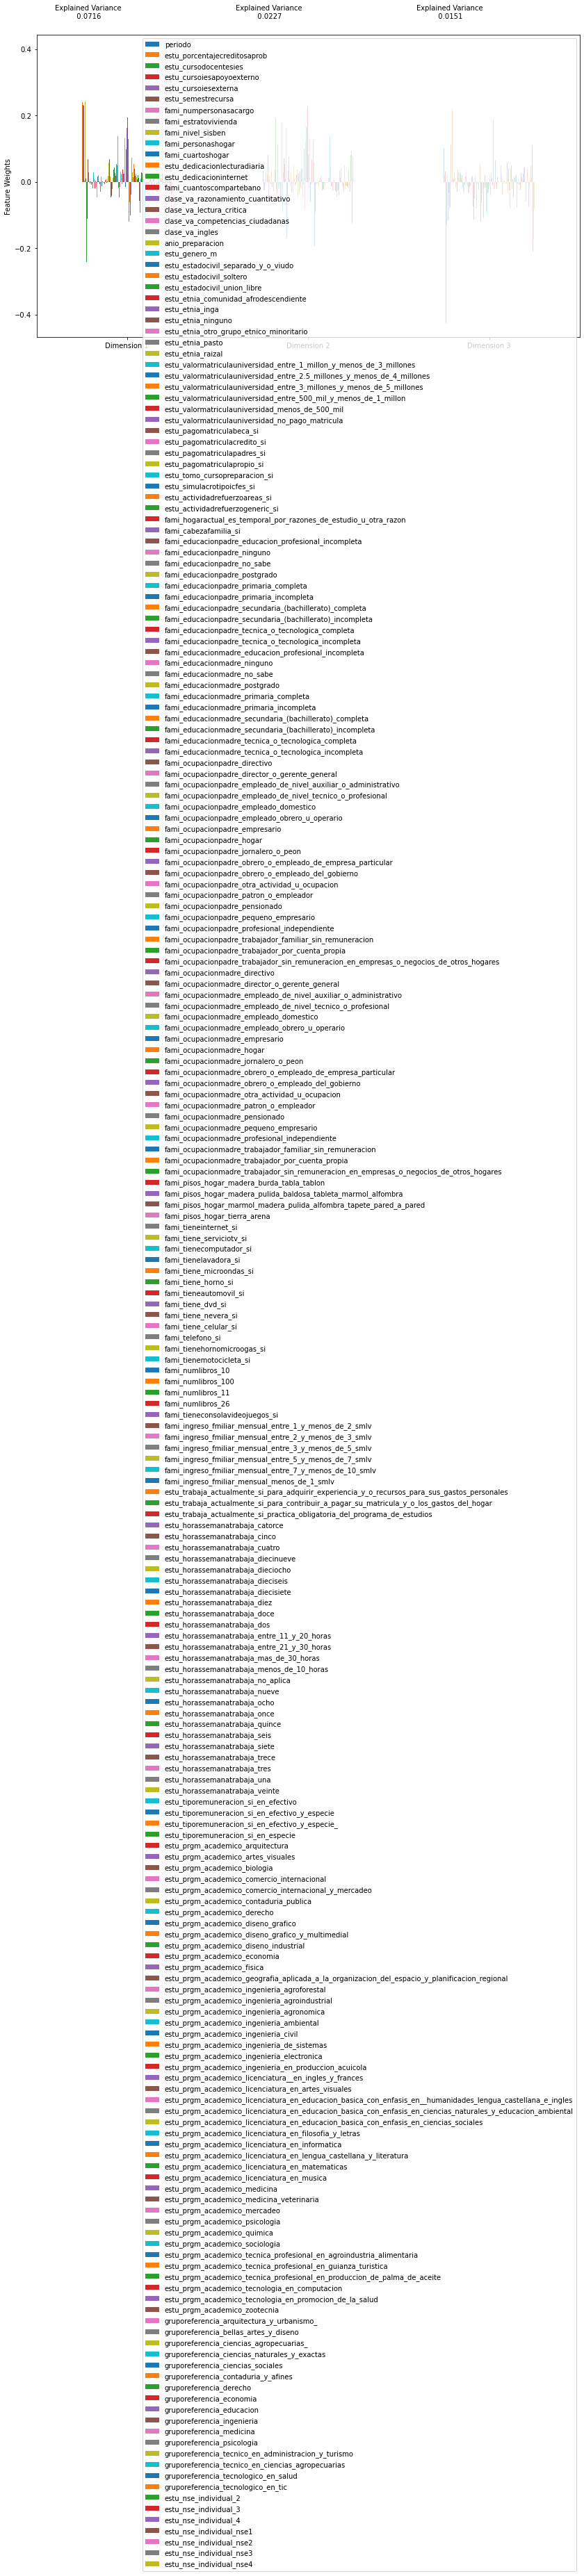

In [23]:
from sklearn.decomposition import PCA
import visuals as vs

#pca = PCA(n_components=len(df_scaled_matrix.keys())).fit(df_scaled_matrix)

#Numero de componentes 
pca = PCA(n_components=3).fit(df_scaled_matrix)

pca_samples = pca.transform(df_scaled_matrix)

# Generate PCA results plot
pca_results = vs.pca_results(df_scaled_matrix, pca)

In [25]:
dimensiones=['Dimension 1', 'Dimension 2']
pca = PCA(n_components=len(dimensiones)).fit(scaled_matrix)
reduced_data = pca.transform(scaled_matrix)
pca_samples =  pca.transform(scaled_matrix)
reduced_data = pd.DataFrame(reduced_data, columns = dimensiones)
reduced_data.head()

,Dimension 1,Dimension 2
0,-4.174798,-0.734082
1,2.772616,-2.798863
2,4.993417,5.125929
3,3.403371,-2.983582
4,3.038764,-1.278559


<AxesSubplot:title={'center':'PC plane with original feature projections.'}, xlabel='Dimension 1', ylabel='Dimension 2'>

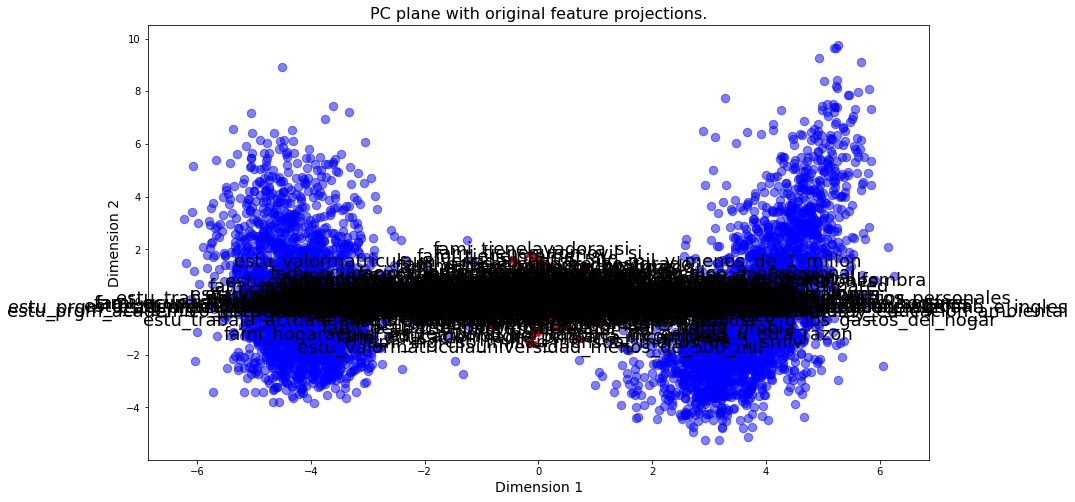

In [26]:
vs.biplot(df_va_dummies, reduced_data, pca)

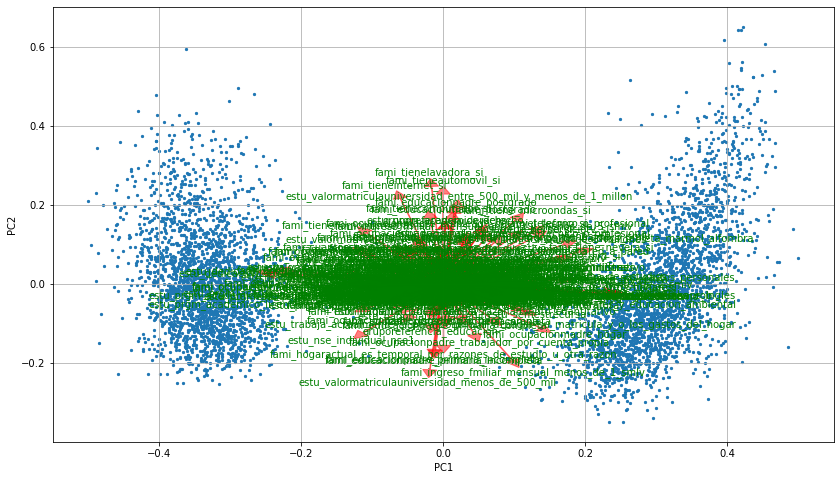

In [27]:
import numpy as np
n = len(df_scaled_matrix.columns)
pcamodel = PCA(n_components=n)
pca = pcamodel.fit_transform(df_scaled_matrix)
pca.shape


from matplotlib import pyplot as plt

def myplot(score,cp1,cp2,coeff,labels=None):
    fig, ax = plt.subplots(figsize = (14,8))
    xs = score[:,cp1]
    ys = score[:,cp2]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],alpha = 0.5,
                  head_width=0.02, head_length=0.02, linewidth=1, color='red')
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'green', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(cp1+1))
    plt.ylabel("PC{}".format(cp2+1))

    plt.grid()


cpx=0
cpy=1

myplot(pca,cpx,cpy,np.transpose(pcamodel.components_[[cpx,cpy], :]),list(df_scaled_matrix.columns))

plt.show()